In [6]:
import pandas as pd 
#pandas is for data structures and data analysis tools
import numpy as np
#numpy is for scientific computing
import matplotlib.pyplot as plt
#matplotlib is for plotting

In [7]:
#In this section we will upload the data from phypox (.cvs format). The data are put in a matrix
# we use read_csv function from pandas to read the data into a "data frame"

#data of elevator from ground to 4th floor in matrix up
up = pd.read_csv('Data from phyphox 39 1 to 4.csv', sep=';', encoding='utf-8')

#elevator from 4th floor to -1 in matrix down
down = pd.read_csv('Data from phyphox 39 4 to neg1.csv', sep=';', encoding='utf-8')

#to show the number of rows of the two matrix

print('number of rows matrix up:  ',len(up))
print('number of rows matrix down:  ', len(down))

#to print the matrix
up.head()
down.head()

number of rows matrix up:   889
number of rows matrix down:   691


,Time (s),Pressure (hPa)
0,0.000000,966.995361
1,0.033325,966.999146
2,0.066650,966.963989
3,0.099976,966.961914
4,0.133301,966.965088


<function matplotlib.pyplot.show(*args, **kw)>

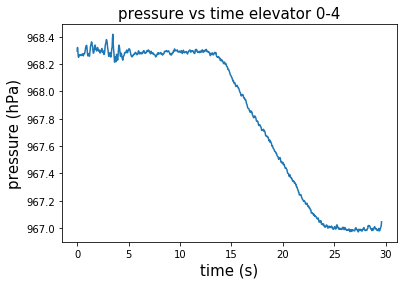

In [8]:
#In this section we will plot the data beginning from elevator from ground to 4th floor

#data from first column of matrix up are fixed as independent variable in the graph.
t1=up["Time (s)"]

#data from second column of matrix up are fixed as dependent variable in the graph.
p1=up["Pressure (hPa)"]

#command to plot the graph
plt.plot(t1,p1) #create the plot
plt.xlabel('time (s)', fontsize = 15) #label x-axis
plt.ylabel('pressure (hPa)', fontsize = 15) #label y-axis
plt.title('pressure vs time elevator 0-4', fontsize = 15) #title of the graph
plt.show



<function matplotlib.pyplot.show(*args, **kw)>

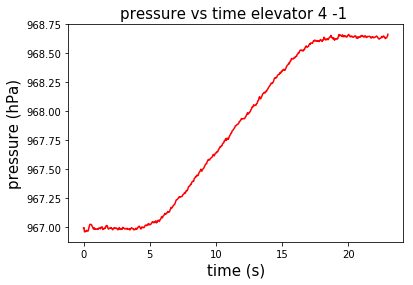

In [9]:
#In this section we will plot the data beginning from elevator from 4th floor to -1

#data from first column of matrix up are fixed as independent variable in the graph.
t2=down["Time (s)"]

#data from second column of matrix up are fixed as dependent variable in the graph.
p2=down["Pressure (hPa)"]

#command to plot the graph
plt.plot(t2,p2, color='red') #create the plot
plt.xlabel('time (s)', fontsize = 15) #label x-axis
plt.ylabel('pressure (hPa)', fontsize = 15) #label y-axis
plt.title('pressure vs time elevator 4 -1 ', fontsize = 15) #title of the graph
plt.show


height of the building: 
10.609084267754184 m


<function matplotlib.pyplot.show(*args, **kw)>

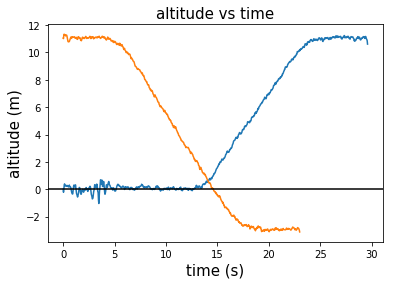

In [10]:
#In this section we analyze the data of down matrix

#estimation of the height of the elevator vs time h1(t)

#parameters: d= air density; p01: pression at ground level; pmax= pression at 4th floor.
d=1.2 
p01=up.loc[888,"Pressure (hPa)"] #data of 888th row of the matrix 
pmax=up.loc[0,"Pressure (hPa)"]  #data of 0th row of the matrix in Pa


#calculation of h1(t)

h=(pmax-p01)/1.2/9.81*100 # height of the bulding
print('height of the building: \n'+str(h) + ' m')
h2=h-(p2-p01)/1.2/9.81*100 
h1=h-(p1-p01)/1.2/9.81*100 

#plot altezza dell'ascensore nel tempo
plt.plot(t1,h1)
plt.plot(t2,h2)
plt.xlabel('time (s)', fontsize = 15)
plt.ylabel('altitude (m)', fontsize = 15)
plt.title('altitude vs time', fontsize = 15)
plt.axhline(y=0, color='black') # draw x-axis
plt.show


-0.12561825659694853
969.9813940050626


<function matplotlib.pyplot.show(*args, **kw)>

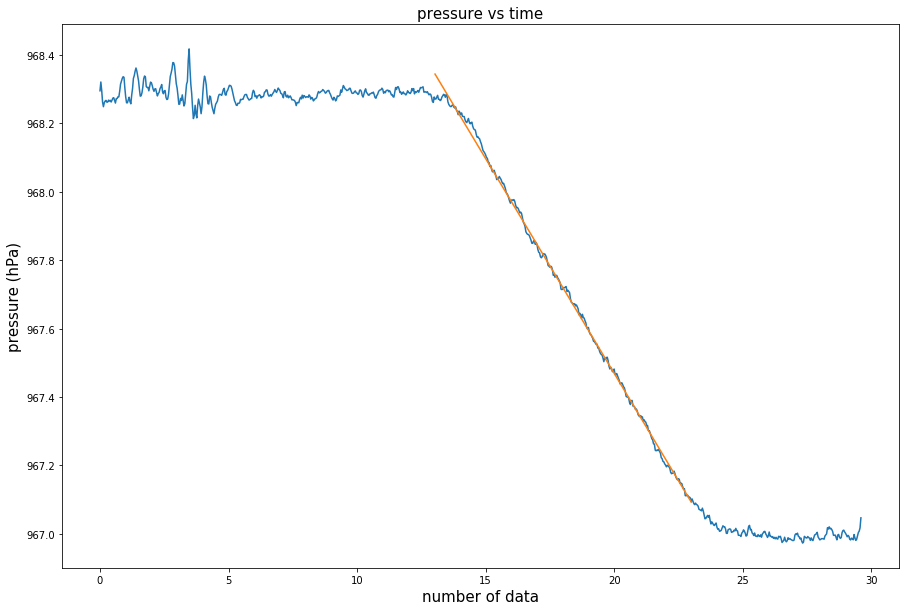

In [11]:
fig = plt.figure(figsize=(15, 10))

#selection of the correct part of the graph to fit
part = up[(up["Time (s)"] >= 13) & (up["Time (s)"] <= 23)]


#plt.plot(part["Pressure (hPa)"])
plt.xlabel('number of data', fontsize = 15)
plt.ylabel('pressure (hPa)', fontsize = 15)
plt.title('pressure vs time', fontsize = 15)

#evaluation of slope and intercept
m,b = np.polyfit(part["Time (s)"], part["Pressure (hPa)"], 1)

#values of parmeters, graph
print ('slope:  \n'+str(h) +m)
print('intercept: \n'+str(h) +b)
plt.plot(up["Time (s)"],up["Pressure (hPa)"],part["Time (s)"], m*part["Time (s)"]+b)
plt.show




slope: speed of the elevator 0 4:  1.0670935830527575m/s 
-14.31990914936388


<function matplotlib.pyplot.show(*args, **kw)>

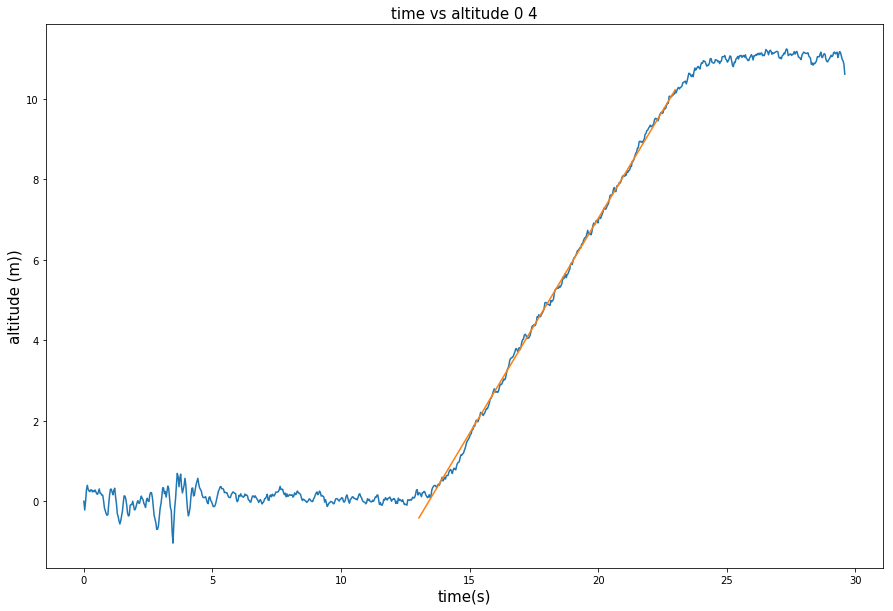

In [37]:
fig = plt.figure(figsize=(15, 10))

#creating a new matrix from vector t1 and h1
matr=pd.concat([t1,h1],axis=1)

#select a part of the data to fit
part = matr[(matr["Time (s)"] >= 13) & (matr["Time (s)"] <= 23)]

#plot the graph 
plt.xlabel('time(s)', fontsize = 15)
plt.ylabel('altitude (m))', fontsize = 15)
plt.title('time vs altitude 0 4', fontsize = 15)

#fitting procedure
m,b = np.polyfit(part["Time (s)"], part["Pressure (hPa)"], 1)
print ('slope: speed of the elevator 0 4:  '+str(m) + ' m/s ')
plt.plot(matr["Time (s)"],matr["Pressure (hPa)"],part["Time (s)"], m*part["Time (s)"]+b)
plt.show



slope:  0.13738111665260463
intercept:  966.2740815904785


<function matplotlib.pyplot.show(*args, **kw)>

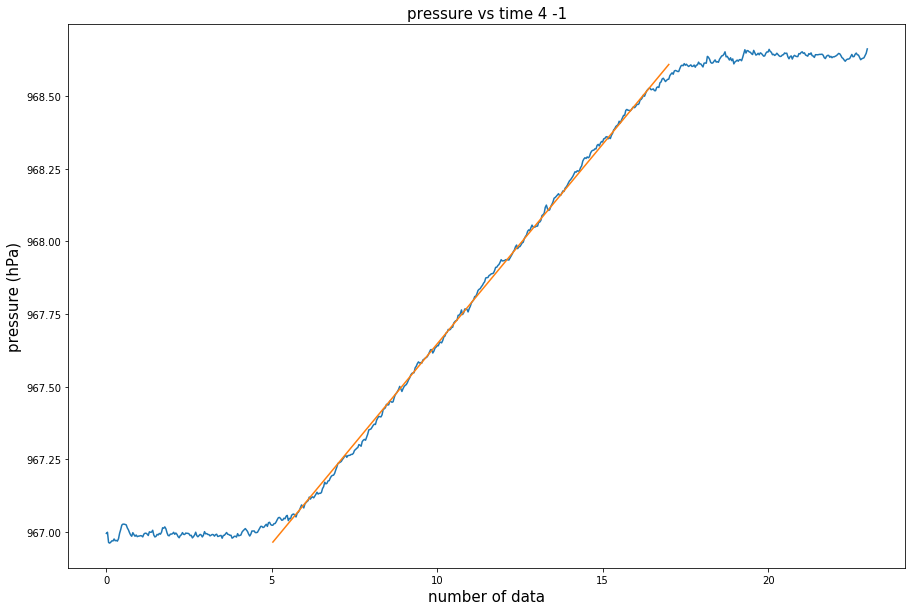

In [33]:
fig = plt.figure(figsize=(15, 10))

#previous procedure for elevator 4 -1
part = down[(down["Time (s)"] >= 5) & (down["Time (s)"] <= 17)]
plt.xlabel('number of data', fontsize = 15)
plt.ylabel('pressure (hPa)', fontsize = 15)
plt.title('pressure vs time 4 -1', fontsize = 15)
m,b = np.polyfit(part["Time (s)"], part["Pressure (hPa)"], 1)

print ('slope:  ' +str(m))
print('intercept:  '+str(b))
plt.plot(down["Time (s)"],down["Pressure (hPa)"],part["Time (s)"], m*part["Time (s)"]+b)
plt.show



slope: speed of the elevator 4 -1 :  -1.1923866087147834 m/s 
17.45556563291455


<function matplotlib.pyplot.show(*args, **kw)>

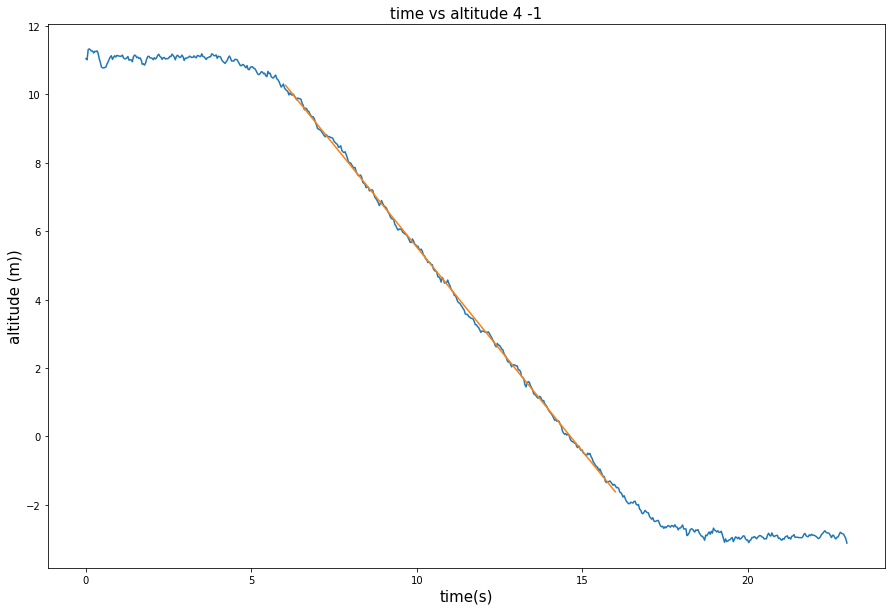

In [38]:
fig = plt.figure(figsize=(15, 10))

#previous procedure for elevator 4 -1
matr2=pd.concat([t2,h2],axis=1)

part = matr2[(matr2["Time (s)"] >= 6) & (matr2["Time (s)"] <= 16)]
plt.xlabel('time(s)', fontsize = 15)
plt.ylabel('altitude (m))', fontsize = 15)
plt.title('time vs altitude 4 -1', fontsize = 15)
m,b = np.polyfit(part["Time (s)"], part["Pressure (hPa)"], 1)

print ('slope: speed of the elevator 4 -1 :  '+str(m) + ' m/s ')

plt.plot(matr2["Time (s)"],matr2["Pressure (hPa)"],part["Time (s)"], m*part["Time (s)"]+b)
plt.show

plt.show